In [ ]:
from huggingface_hub import interpreter_login
interpreter_login()

In [1]:
from diffusers import BitsAndBytesConfig, SD3Transformer2DModel
import torch

model_id = "stabilityai/stable-diffusion-3.5-large"
nf4_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)
model_nf4 = SD3Transformer2DModel.from_pretrained(
    model_id,
    subfolder="transformer",
    quantization_config=nf4_config,
    torch_dtype=torch.bfloat16
)


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (200 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. the skin is textured with the familiar grid pattern of a waffle, each square filled with a glistening sheen of syrup. the environment combines the natural habitat of a hippo with elements of a breakfast table setting, a river of warm, melted butter, with oversized utensils or plates peeking out from the lush, pancake - like foliage in the background, a towering pepper mill standing in for a tree. as the sun rises in this fantastical world, it casts a warm, buttery glow over the scene. the creature, content in its butter river, lets out a yawn. nearby, a flock of birds take flight']
Token indices sequence length is longer than the specified maximum sequence length for this model (200 > 77). Running this 

  0%|          | 0/28 [00:00<?, ?it/s]

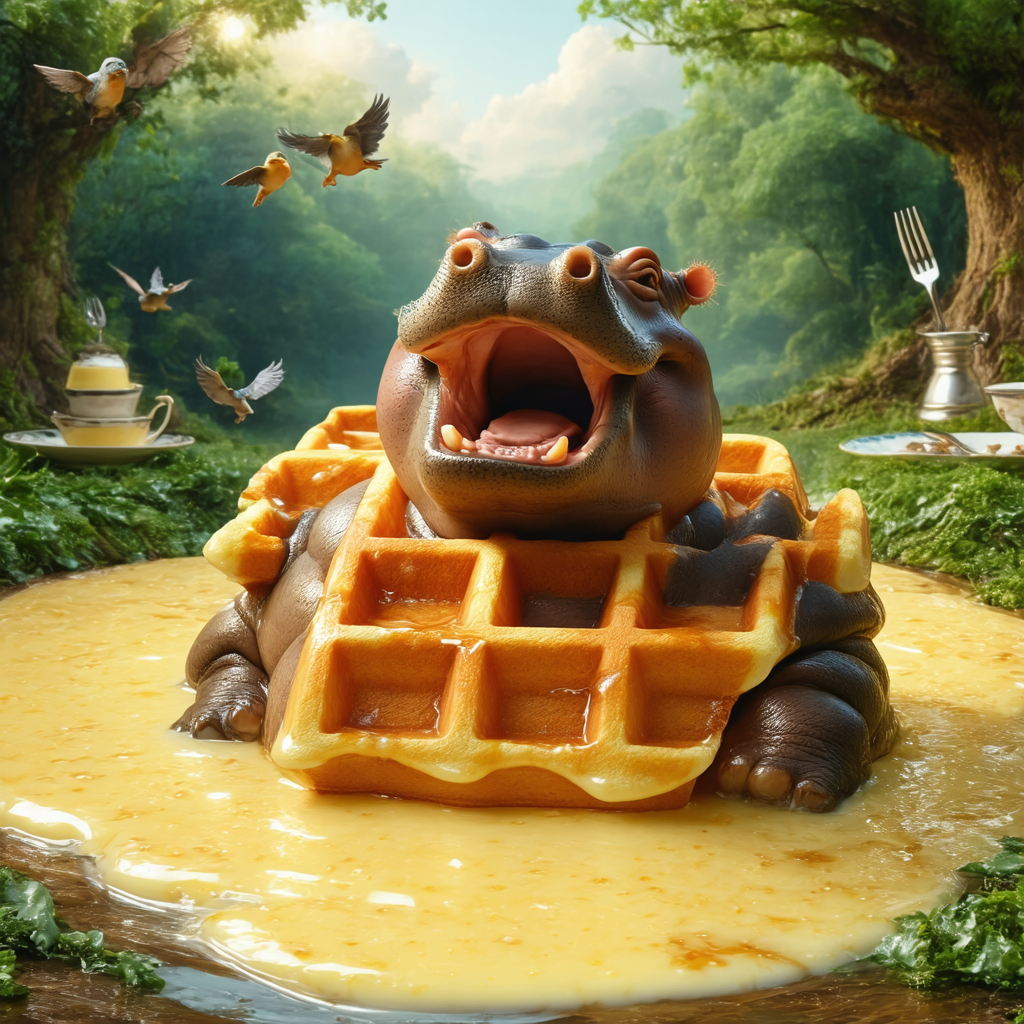

In [2]:
from diffusers import StableDiffusion3Pipeline

pipeline = StableDiffusion3Pipeline.from_pretrained(
    model_id, 
    transformer=model_nf4,
    torch_dtype=torch.bfloat16
)
pipeline.enable_model_cpu_offload()

prompt = "A whimsical and creative image depicting a hybrid creature that is a mix of a waffle and a hippopotamus, basking in a river of melted butter amidst a breakfast-themed landscape. It features the distinctive, bulky body shape of a hippo. However, instead of the usual grey skin, the creature's body resembles a golden-brown, crispy waffle fresh off the griddle. The skin is textured with the familiar grid pattern of a waffle, each square filled with a glistening sheen of syrup. The environment combines the natural habitat of a hippo with elements of a breakfast table setting, a river of warm, melted butter, with oversized utensils or plates peeking out from the lush, pancake-like foliage in the background, a towering pepper mill standing in for a tree.  As the sun rises in this fantastical world, it casts a warm, buttery glow over the scene. The creature, content in its butter river, lets out a yawn. Nearby, a flock of birds take flight"
image = pipeline(
    prompt=prompt,
    negative_prompt="",
    num_inference_steps=28,
    guidance_scale=4.5,
    max_sequence_length=512,
).images[0]
image.save("whimsical.png")
image
